In [1]:
%run ../_config/config.py # Import the configuration settings
import itertools
import logging
import statistics as stat
from scipy import stats
import cmdstanpy
from cmdstanpy import CmdStanModel
cmdstanpy.utils.get_logger().setLevel(logging.ERROR)

In [2]:
good_chains = stats.beta.rvs(2, 5, size=(2, 2000))
bad_chains0 = np.random.normal(
    np.sort(good_chains, axis=None), 0.05, size=4000
).reshape(2, -1)

bad_chains1 = good_chains.copy()
for i in np.random.randint(1900, size=4):
    bad_chains1[i % 2 :, i : i + 100] = np.random.beta(i, 950, size=100)

chains = {
    "good_chains": good_chains,
    "bad_chains0": bad_chains0,
    "bad_chains1": bad_chains1,
}

/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_33232/1649262987.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


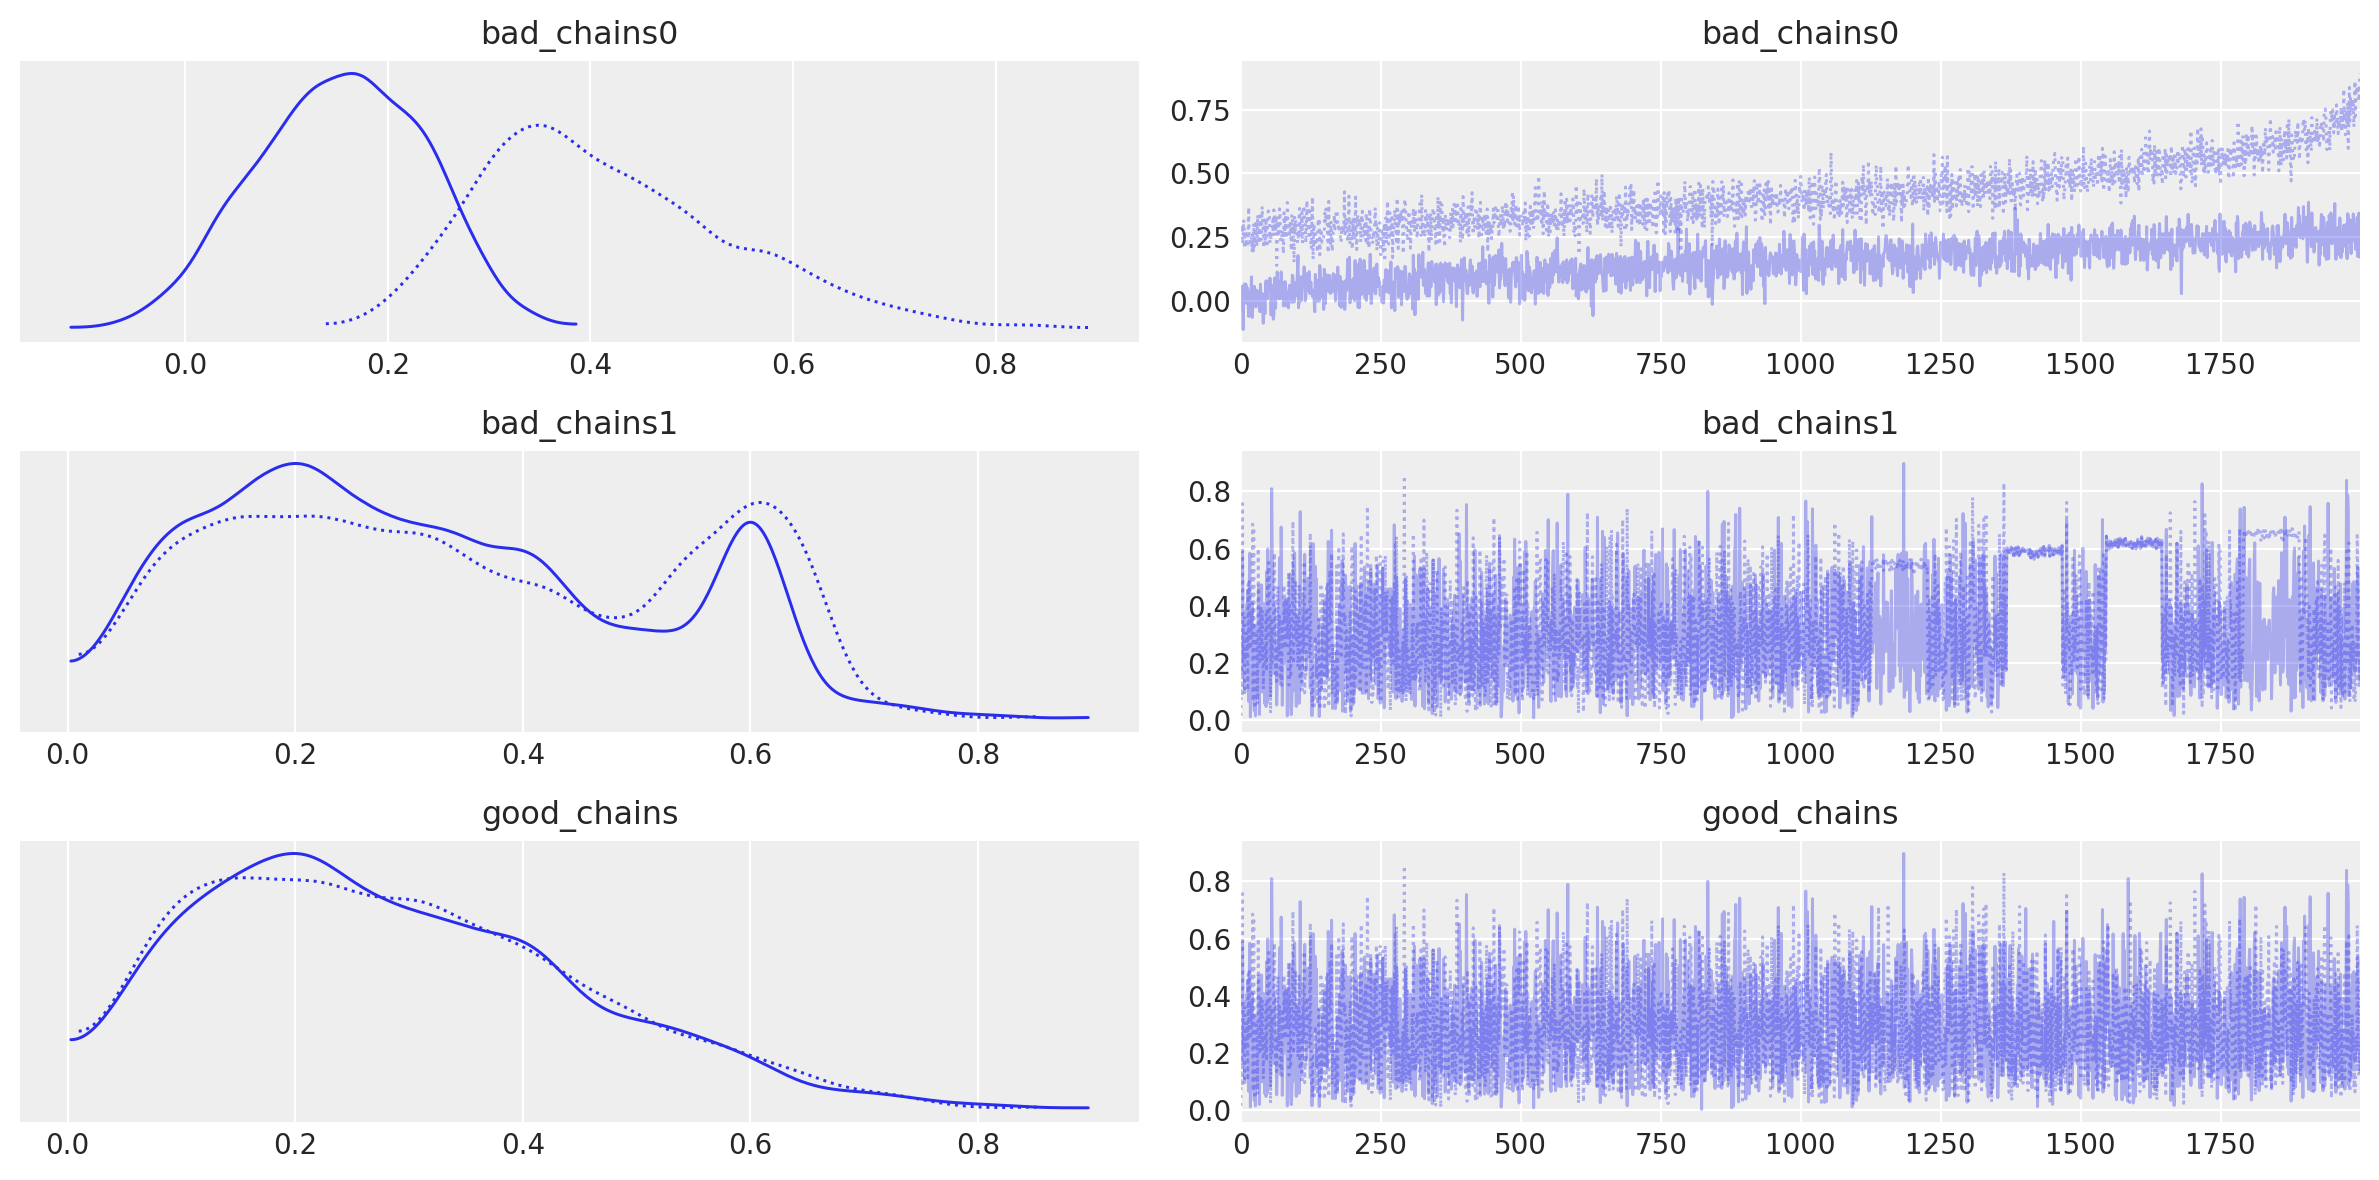

In [3]:
az.plot_trace(chains)
plt.tight_layout()

/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_33232/3352968699.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


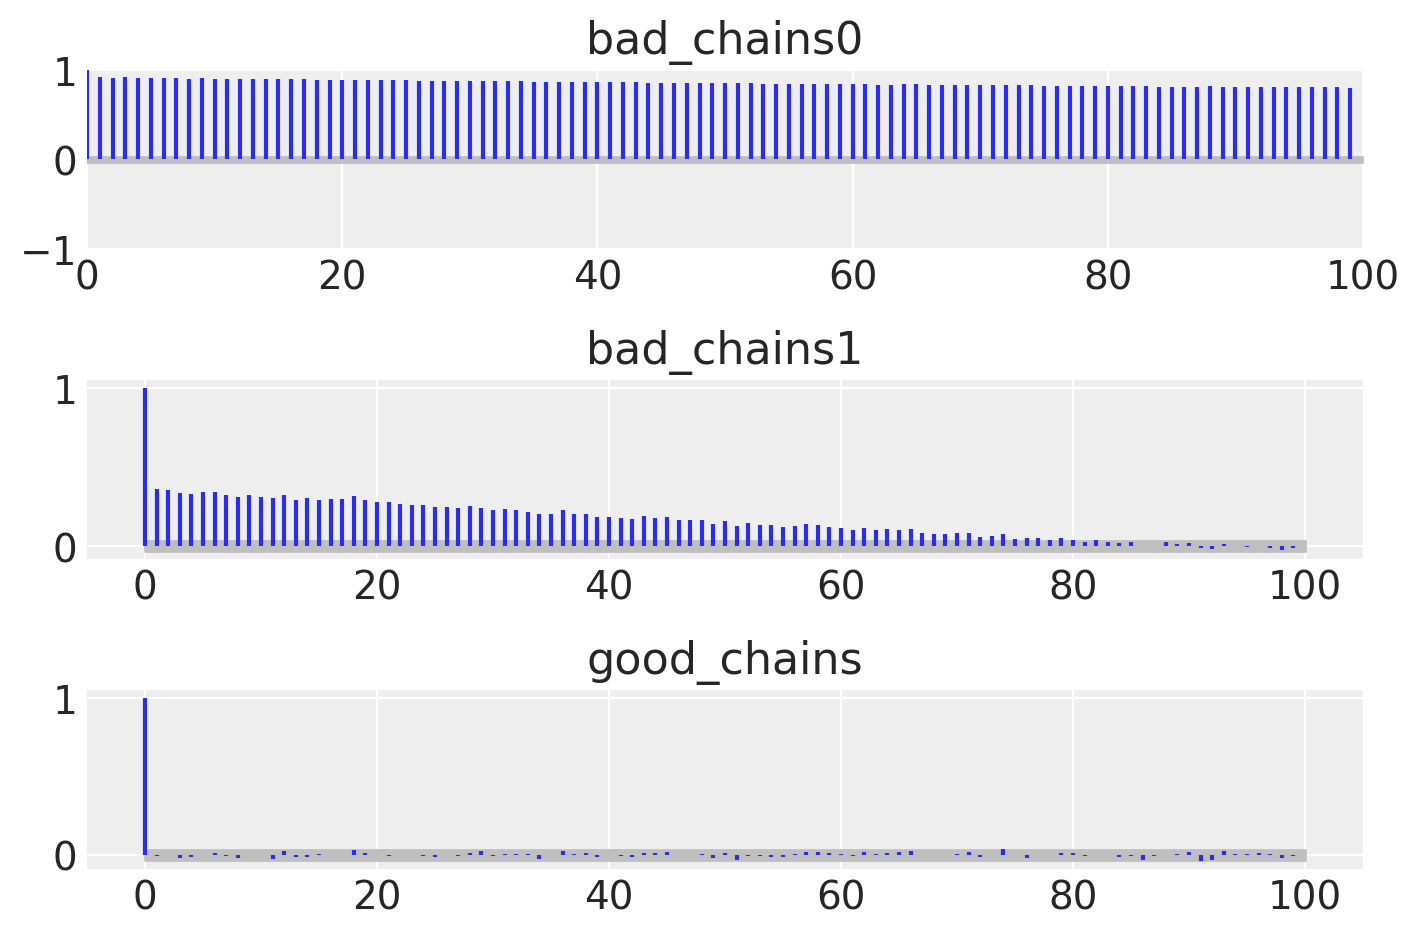

In [4]:
fig, ax = plt.subplots(3, 1)  
az.plot_autocorr(chains, combined=True, ax=ax)
plt.tight_layout()

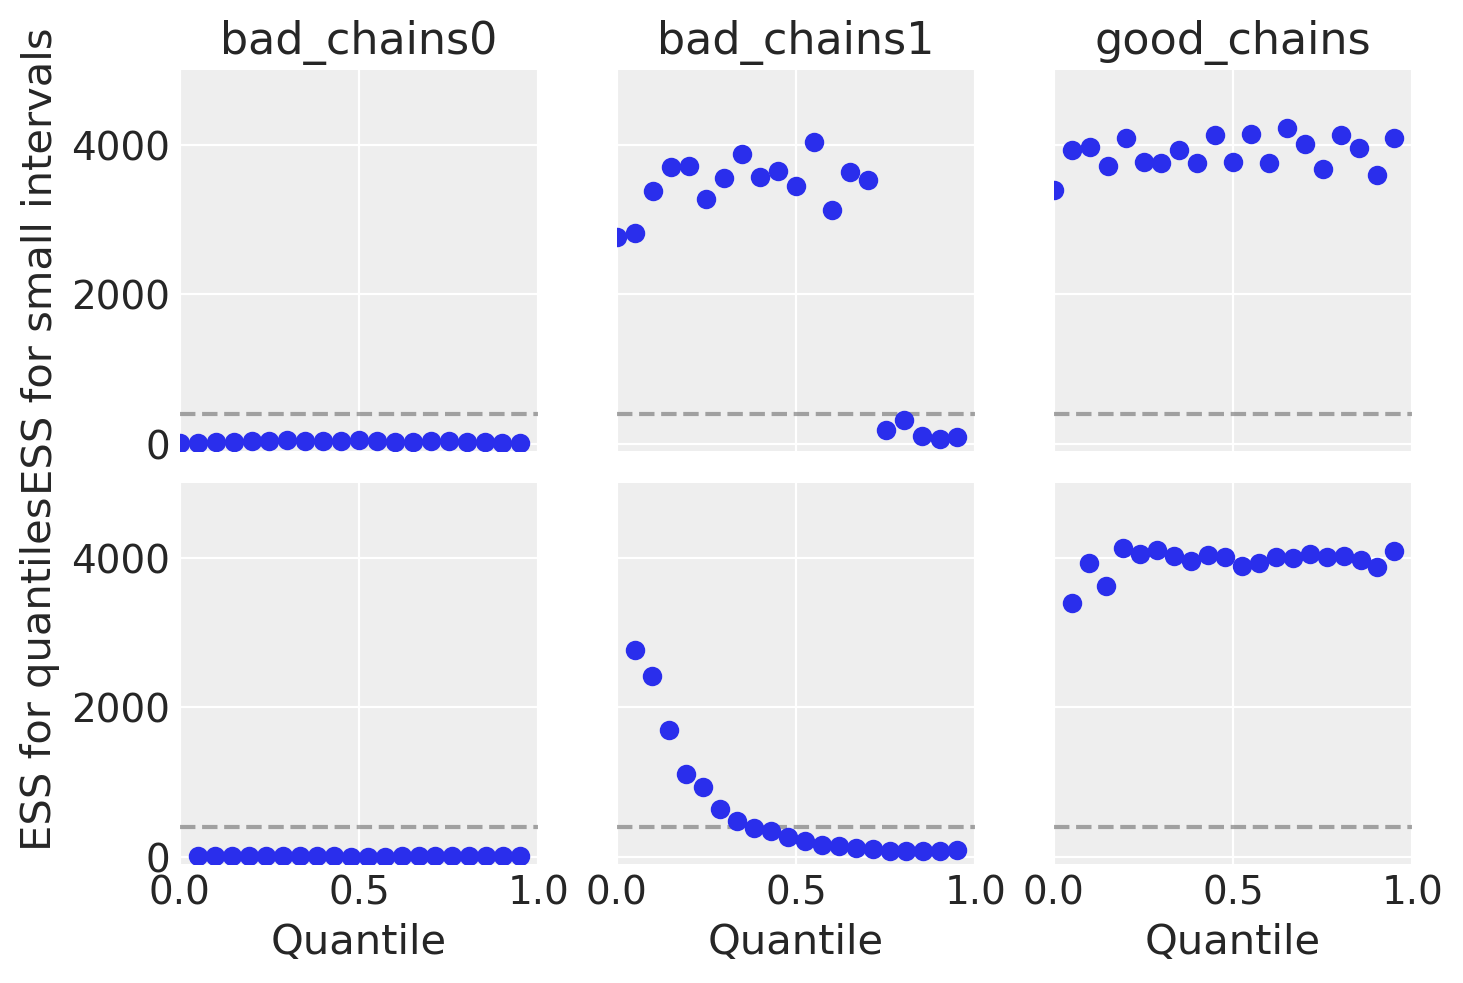

In [5]:
_, axes = plt.subplots(2, 3, sharey=True, sharex=True)
az.plot_ess(chains, kind="local", ax=axes[0])
az.plot_ess(chains, kind="quantile", ax=axes[1])

for ax_ in axes[0]:
    ax_.set_xlabel("")
for ax_ in axes[1]:
    ax_.set_title("")

for ax_ in axes[:, 1:].ravel():
    ax_.set_ylabel("")
plt.ylim(-100, 5000);

In [6]:
az.rhat(chains)

<xarray.Dataset> Size: 24B
Dimensions:      ()
Data variables:
    bad_chains0  float64 8B 2.422
    bad_chains1  float64 8B 1.052
    good_chains  float64 8B 0.9999

In [7]:
az.mcse(chains)

<xarray.Dataset> Size: 24B
Dimensions:      ()
Data variables:
    bad_chains0  float64 8B 0.1101
    bad_chains1  float64 8B 0.01759
    good_chains  float64 8B 0.002544

/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_33232/197732187.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


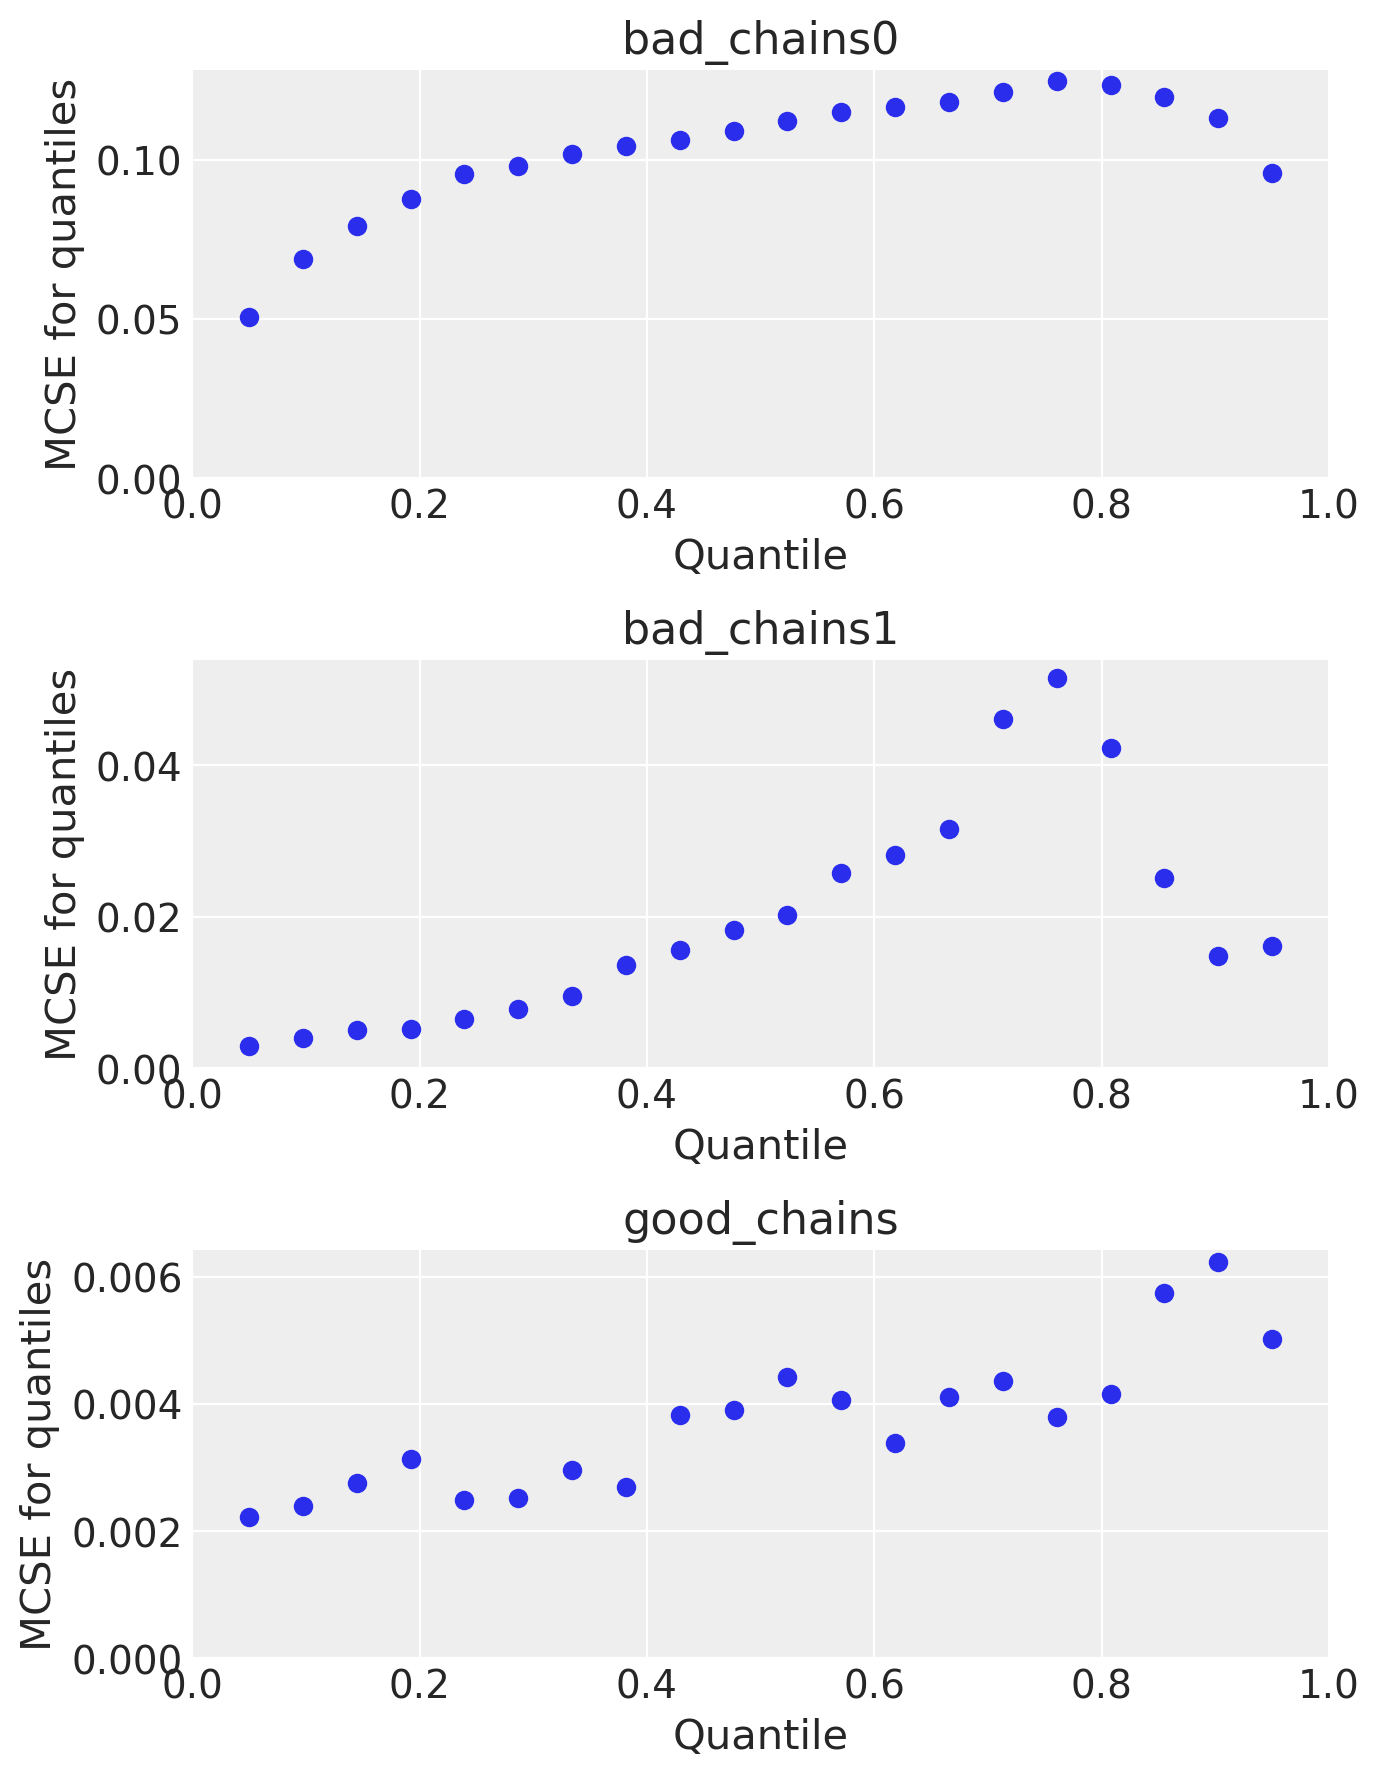

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(7, 9))  
az.plot_mcse(chains, ax=ax)
plt.tight_layout()

/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_33232/2610568305.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


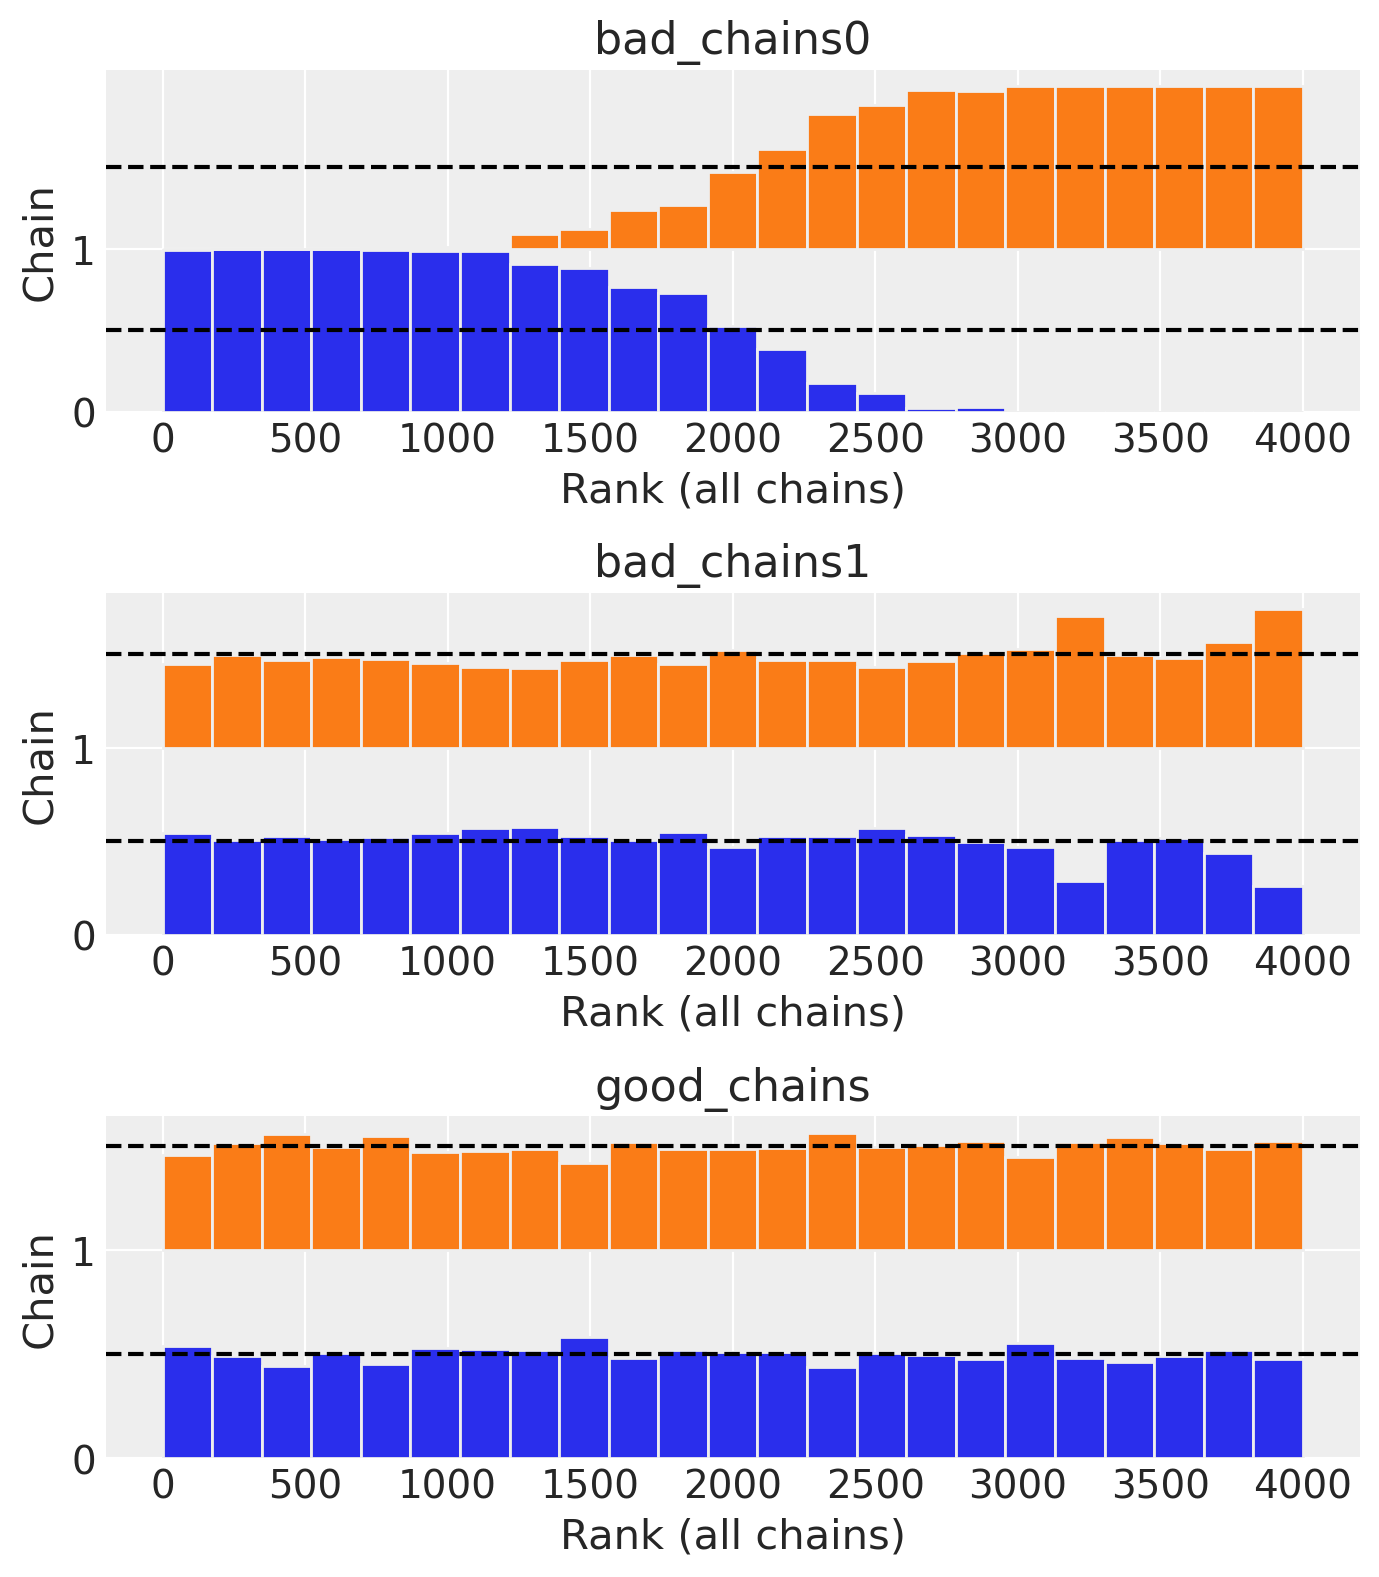

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(7, 8))  
az.plot_rank(chains, kind="bars", ax=ax)
plt.tight_layout()

/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_33232/353816278.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


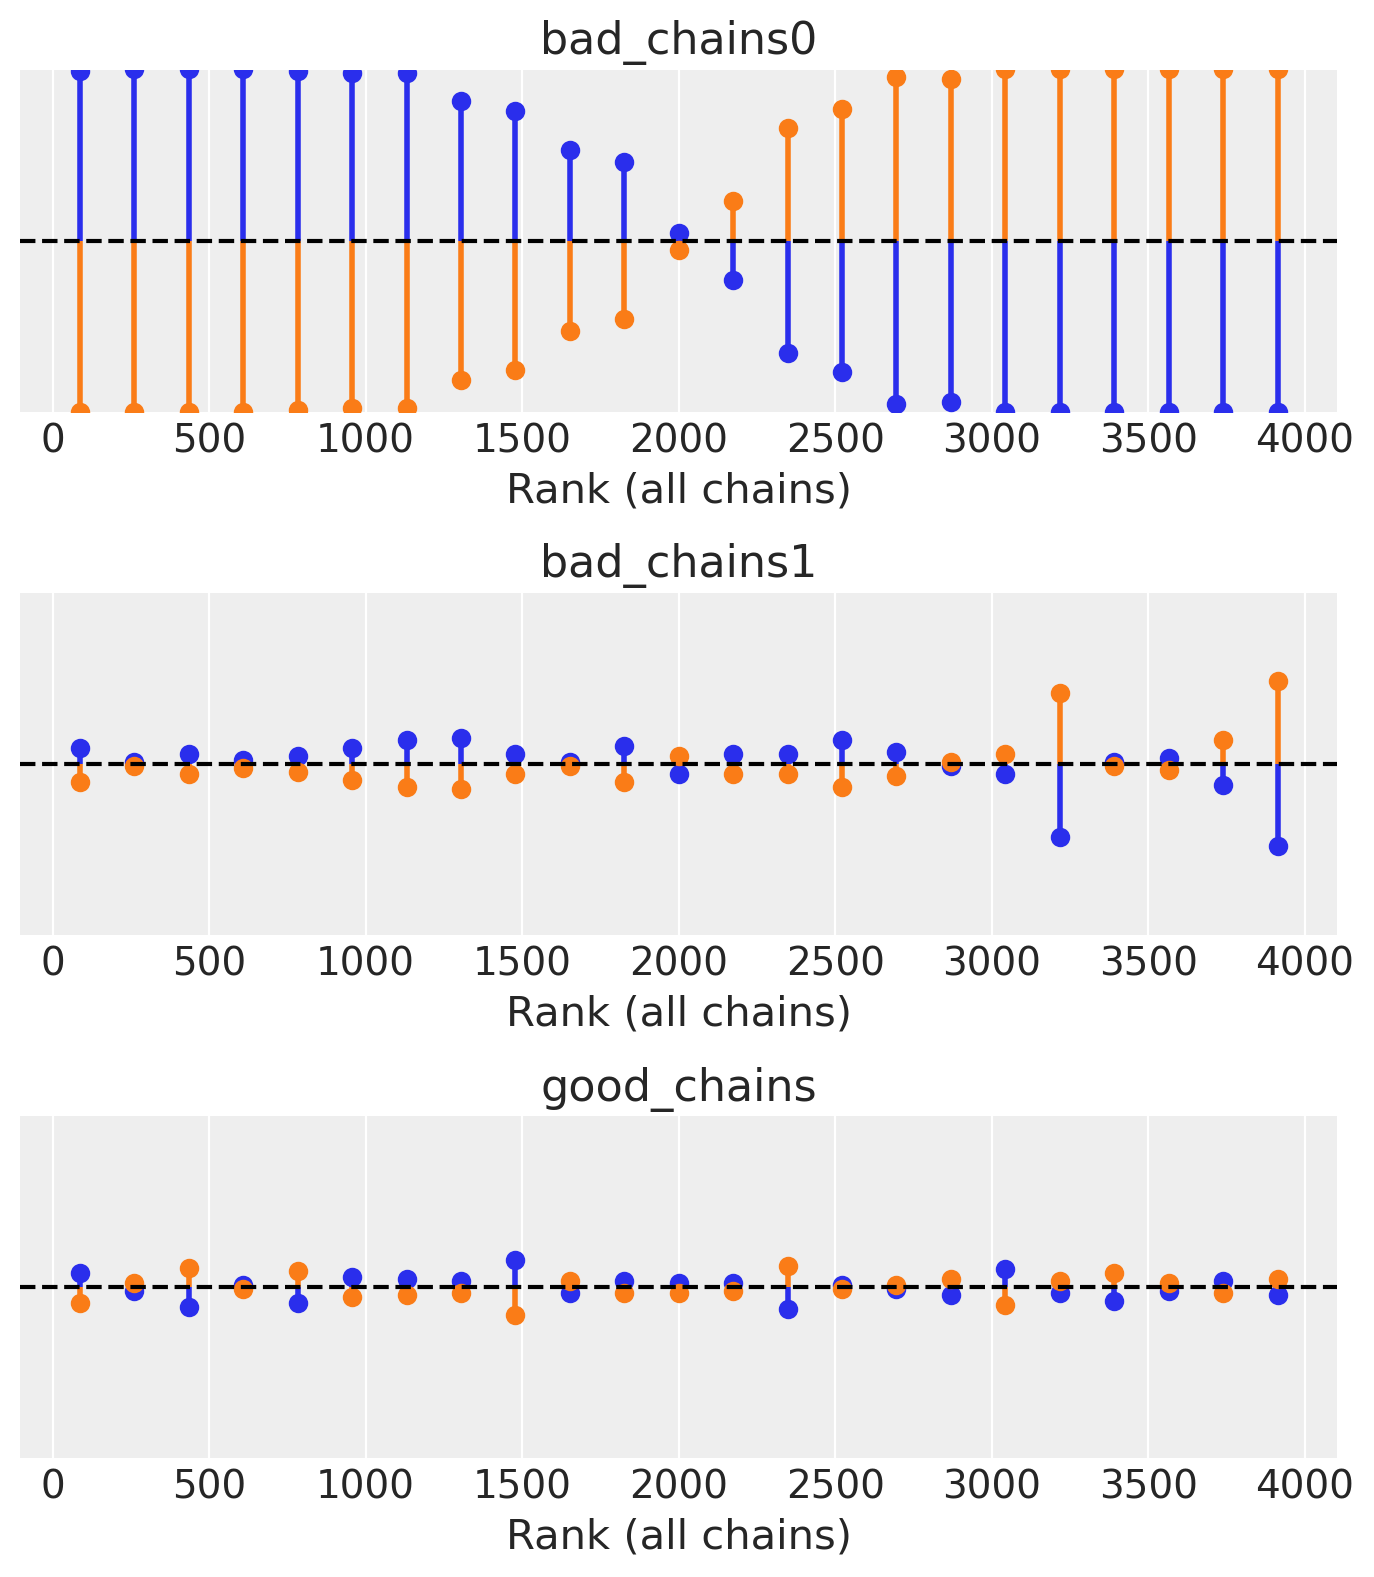

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(7, 8))  
az.plot_rank(chains, kind="vlines", ax=ax)
plt.tight_layout()

In [11]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sun Jun 16 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

arviz     : 0.18.0
numpy     : 1.26.4
matplotlib: 3.8.4
pandas    : 2.2.2
scipy     : 1.13.1
cmdstanpy : 1.2.3
logging   : 0.5.1.2

Watermark: 2.4.3

